
# Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day).  You are given a NumPy array `movements` of daily price movements from 2010 to 2013, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others.  To account for this, include a `Normalizer` at the beginning.  The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

## Normalizer vs StandardScaler
Note that `Normalizer()` is different to `StandardScaler(). While `StandardScaler()` standardizes **features**  by removing the mean and scaling to unit variance, `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

This dataset was obtained from the Yahoo! Finance API.

**Step 1:** Load the data 

In [52]:
your_local_path="C:/Users/IBM_ADMIN/Desktop/Technical_Doc/Data_Science/UPX_Academy/DataScience_Class/Practice/"

In [53]:
import pandas as pd

fn = your_local_path+'ML_attachment_company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)


**Step 2:** Inspect the first few rows of the DataFrame `stocks_df` by calling its `head()` function.

In [54]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [55]:
stocks_df.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


**Step 3:** Extract the NumPy array `movements` from the DataFrame and the list of company names (_written for you_)

In [56]:
companies = list(stocks_df.index)
companies
movements = stocks_df.values
movements

array([[  5.80000000e-01,  -2.20005000e-01,  -3.40999800e+00, ...,
         -5.35996200e+00,   8.40019000e-01,  -1.95899810e+01],
       [ -6.40002000e-01,  -6.50000000e-01,  -2.10001000e-01, ...,
         -4.00010000e-02,  -4.00002000e-01,   6.60000000e-01],
       [ -2.35000600e+00,   1.26000900e+00,  -2.35000600e+00, ...,
          4.79000900e+00,  -1.76000900e+00,   3.74002100e+00],
       ..., 
       [  4.30001000e-01,   2.29996000e-01,   5.70000000e-01, ...,
         -2.60002000e-01,   4.00001000e-01,   4.80003000e-01],
       [  9.00000000e-02,   1.00000000e-02,  -8.00000000e-02, ...,
         -3.00000000e-02,   2.00000000e-02,  -3.00000000e-02],
       [  1.59999000e-01,   1.00010000e-02,   0.00000000e+00, ...,
         -6.00010000e-02,   2.59998000e-01,   9.99980000e-02]])

**Step 4:** Make the necessary imports:

- `Normalizer` from `sklearn.preprocessing`.
- `KMeans` from `sklearn.cluster`.
- `make_pipeline` from `sklearn.pipeline`.

In [57]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans


**Step 3:** Create an instance of `Normalizer` called `normalizer`.

In [58]:
from sklearn.preprocessing import MinMaxScaler
scld = Normalizer()
arr_scld = scld.fit_transform(stocks_df)
df_scld = pd.DataFrame(arr_scld, columns=stocks_df.columns)
df_scld.head()


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
1,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
2,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
3,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
4,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541


In [59]:
df_scld.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.019058,0.006312,0.000630,0.008985,0.013988,-0.003763,0.003154,0.014999,0.011125,-0.023272,...,0.023372,0.039079,0.012262,-0.003902,0.010560,-0.000093,0.001207,0.005747,0.013558,0.013013
std,0.029663,0.026387,0.024068,0.031485,0.022541,0.026291,0.028238,0.020361,0.025086,0.023275,...,0.028440,0.029394,0.031121,0.029678,0.031763,0.043953,0.036643,0.029733,0.027686,0.028953
min,-0.093285,-0.042849,-0.076951,-0.066895,-0.029658,-0.051388,-0.089504,-0.033751,-0.055975,-0.079213,...,-0.090966,-0.018364,-0.033487,-0.132207,-0.086750,-0.074120,-0.192058,-0.059550,-0.030029,-0.102020
25%,0.002430,-0.011077,-0.013759,-0.008433,-0.002362,-0.018580,-0.014310,0.001206,-0.003773,-0.035189,...,0.005121,0.020712,-0.004329,-0.018426,-0.002539,-0.023016,-0.017505,-0.012794,-0.006795,-0.003969
50%,0.017661,0.000643,-0.000602,0.007894,0.009476,-0.007362,0.003353,0.013330,0.010571,-0.021445,...,0.028338,0.033181,0.003037,0.000000,0.012190,-0.006401,0.002063,-0.000519,0.004233,0.010900
75%,0.036287,0.016366,0.017834,0.027802,0.030580,0.007766,0.025252,0.027603,0.026941,-0.007862,...,0.042096,0.065572,0.024872,0.010789,0.030823,0.007578,0.020731,0.017854,0.030382,0.023201
max,0.098275,0.074839,0.052703,0.112810,0.060058,0.082887,0.063844,0.071277,0.067208,0.031842,...,0.080407,0.109404,0.152285,0.049943,0.082647,0.146723,0.079898,0.087687,0.096387,0.096255


In [60]:
df_scld.shape

(60, 963)

**Step 4:** Create an instance of `KMeans` called 'clusters' with `14` clusters.

In [61]:
#let's build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,15)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
    
df=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df
#print (clusters)

,Cluster_Numbers,Error_Term
0,2,0.333538
1,3,0.318524
2,4,0.307363
3,5,0.301873
4,6,0.290216
5,7,0.277381
6,8,0.270342
7,9,0.260342
8,10,0.251700
9,11,0.243376


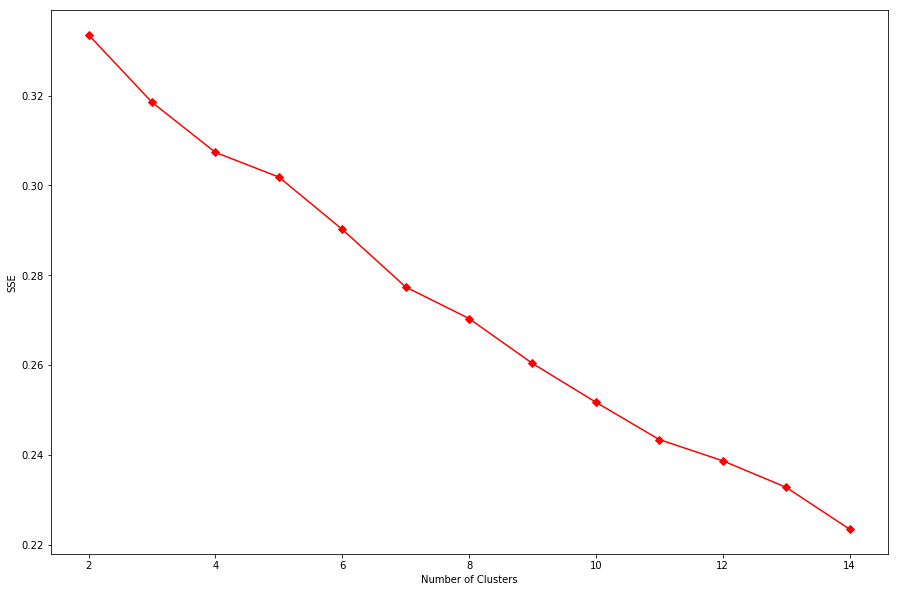

In [62]:
#Find the right number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [63]:
#Build 5 clusters
clusters = KMeans(14)
clusters.fit(df_scld)
clusters.labels_


array([ 5,  6,  5,  1,  4,  6, 11, 12,  3,  2,  0,  8,  0,  3,  7,  6,  6,
        5,  6, 11,  1, 12,  7,  0,  8, 11,  6,  2, 10,  4,  1, 10,  3,  8,
       12,  3,  4, 11, 10,  0,  2, 10,  0,  0,  0, 12, 11,  8, 12,  0, 12,
        3, 11,  0, 13,  6, 10,  0, 12,  9])

In [64]:
labels = clusters.predict(movements)
labels

array([ 5,  6,  5,  1,  4,  6, 11, 12,  3,  2,  0,  8,  0,  3,  7,  6,  6,
        5,  6, 11,  1, 12,  7,  0,  8, 11,  6,  2, 10,  4,  1, 10,  3,  8,
       12,  3,  4, 11, 10,  0,  2, 10,  0,  0,  0, 12, 11,  8, 12,  0, 12,
        3, 11,  0, 13,  6, 10,  0, 12,  9])

In [65]:
companies = stocks_df.index

In [66]:
dff = pd.DataFrame({'labels': labels, 'companies': companies})
dff.sort_values('labels')

,companies,labels
43,SAP,0
39,Pfizer,0
42,Royal Dutch Shell,0
12,Chevron,0
10,ConocoPhillips,0
44,Schlumberger,0
23,IBM,0
53,Valero Energy,0
49,Total,0
57,Exxon,0


In [67]:
stocks_df['Cluster'] = clusters.labels_
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29,Cluster
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,5
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,6
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,5
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,1
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,4


# **Note Point!** Using k-means, it has been discovered which companies stock prices move together on the stock exchange.

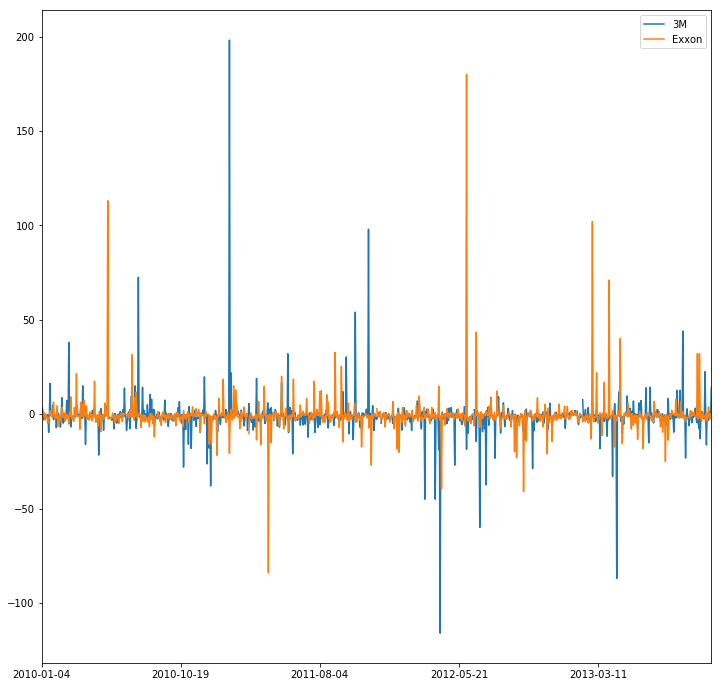

In [68]:
#Analyze a cluster
#three_stocks = stocks_test['Unilever','Walgreen','Xerox']
stocks_df.T.head()
stock1 = stocks_df.T['3M']
stock2 = stocks_df.T['Exxon']
#stock3 = stocks_df.T['Yahoo']
tech_stocks = pd.concat([stock1, stock2], axis=1)
tech_stocks.head()
tech_stocks.pct_change().plot(figsize=(12,12))

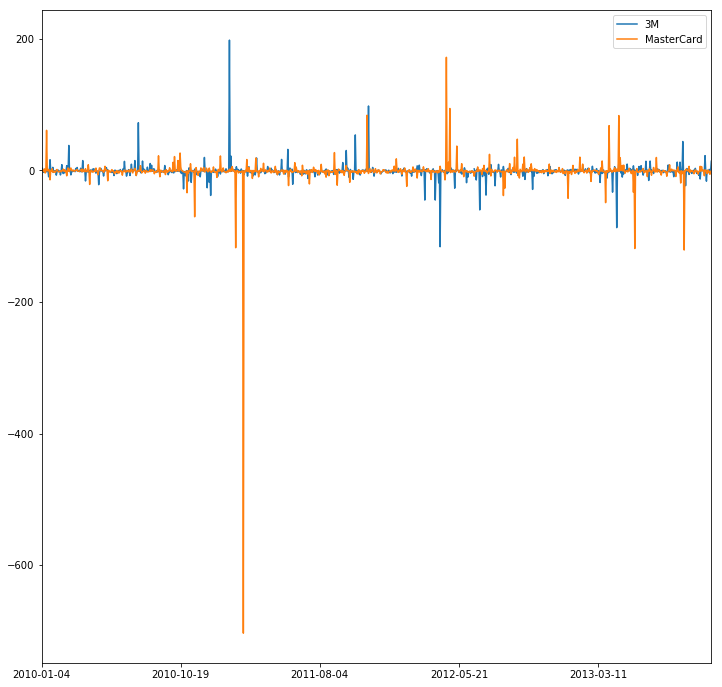

In [69]:
#Analyze same cluster
#three_stocks = stocks_test['Unilever','Walgreen','Xerox']
stocks_df.T.head()
stock1 = stocks_df.T['3M']
stock2 = stocks_df.T['MasterCard']
#stock3 = stocks_df.T['Yahoo']
tech_stocks = pd.concat([stock1, stock2], axis=1)
tech_stocks.head()
tech_stocks.pct_change().plot(figsize=(12,12))

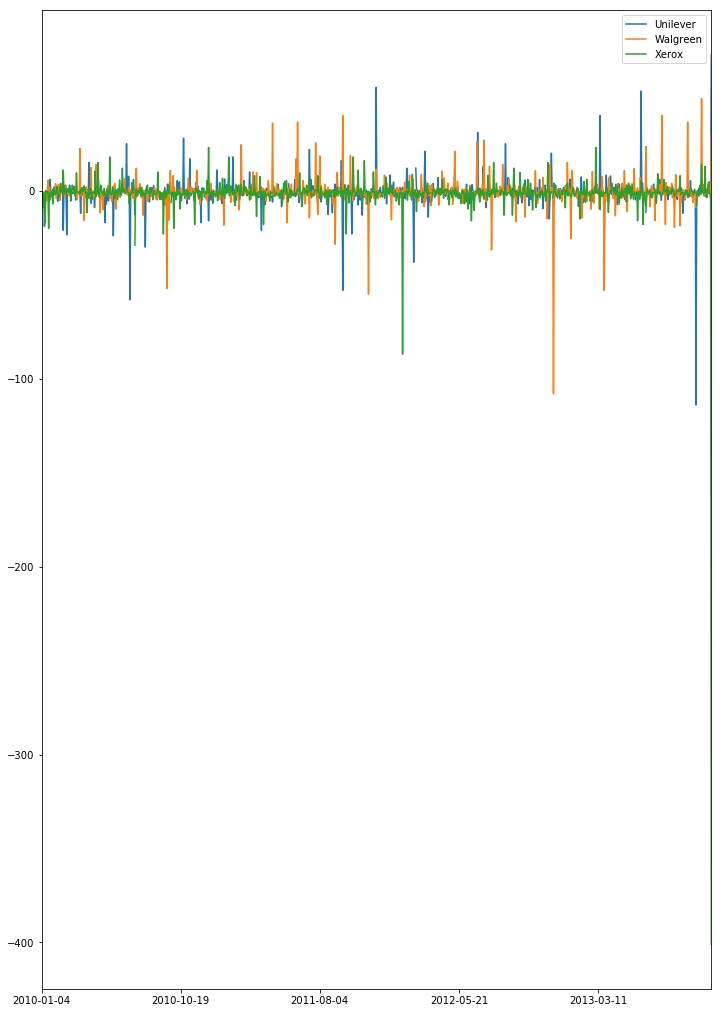

In [70]:
#Analyze a cluster
#three_stocks = stocks_test['Unilever','Walgreen','Xerox']
stocks_df.T.head()
stock1 = stocks_df.T['Unilever']
stock2 = stocks_df.T['Walgreen']
stock3 = stocks_df.T['Xerox']
tech_stocks = pd.concat([stock1, stock2, stock3], axis=1)
tech_stocks.head()
tech_stocks.pct_change().plot(figsize=(12,18))

** Now we can invest and see if it increases profit for stocks.